## Residual Neural Network (ResNet)
- ResNet is proposed in this paper:
He, Zhang, Ren, and Sun (2016). Deep Residual Learning for Image Recognition. 2016. CVPR (cited >150k).

- Motivation: vanishing gradient problem when the number of layers is too large

### architecture:
- Original Feedforward Neural Network:
$$
\begin{aligned}
z^{(1)} &= x, \\
z^{(i+1)} &= \sigma(W^{(i)} z^{(i)} + b^{(i)}), \quad i=1,2,\cdots,L, \\
y &= W^{(L+1)} z^{(L+1)} + b^{(L+1)}
\end{aligned}
$$

- ResNet:
$$
\begin{aligned}
z^{(1)} &= x, \\
z^{(i+1)} &= z^{(i)} + \sigma(W^{(i)} z^{(i)} + b^{(i)}), \quad i=1,2,\cdots,L, \\
y &= W^{(L+1)} z^{(L+1)} + b^{(L+1)}
\end{aligned}
$$

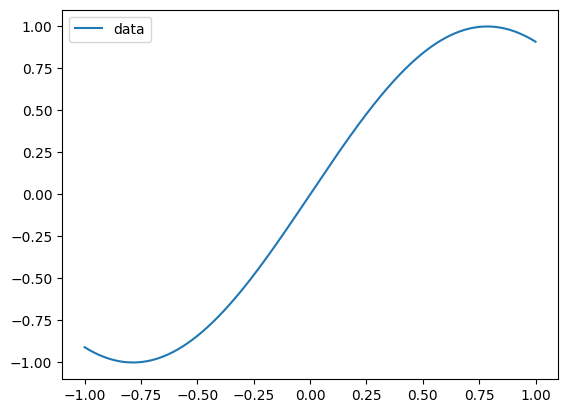

In [16]:
# install pytorch

import matplotlib.pyplot as plt
import numpy as np
import torch
import time

N = 1000
x_data = torch.linspace(-1, 1, N)
x_data = torch.reshape(x_data, (N, 1))
y_data = torch.sin(2*x_data)

plt.figure()
plt.plot(x_data, y_data, '-', label='data')
plt.legend()
plt.show()

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time

# feedforward neural network with arbitrary number of layers
class FNN(torch.nn.Module):
    
    def __init__(self, input_size, output_size, num_layers, hidden_size, activiation):
        super(FNN, self).__init__()
        
        # dimension of the input data: x
        self.input_size = input_size
        
        # dimension of the output data: y
        self.output_size = output_size
        
        # number of layers
        self.num_layers = num_layers
        
        # number of neurons in the hidden layers
        self.hidden_size = hidden_size
        
        # activation functions
        self.activiation = activiation
        
        # first hidden layer
        self.layers = torch.nn.ModuleList([torch.nn.Linear(input_size, hidden_size)])
        # hidden layers inside the neural network
        self.layers.extend([torch.nn.Linear(hidden_size, hidden_size) for i in range(1, self.num_layers-1)])
        # output layer
        self.layers.append(torch.nn.Linear(hidden_size, output_size))
        
        # activation function list: relu, tanh
        self.act_list = {'relu': torch.nn.ReLU(), 'tanh': torch.nn.Tanh()}
        self.act_func = self.act_list[self.activiation]
    
    def forward(self, x):
        
        # input layer
        z = x
        
        for i in range(self.num_layers):
            
            if i < (self.num_layers-1):

                z = z + self.act_func(self.layers[i](z))
            
            else:
                # output layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                
        return z

epoch: 0; MSE: 8.36e+18; elapsed time: 0.02 sec
epoch: 1000; MSE: 8.75e+02; elapsed time: 13.43 sec
epoch: 2000; MSE: 8.75e+02; elapsed time: 26.81 sec
epoch: 3000; MSE: 8.74e+02; elapsed time: 40.18 sec
epoch: 4000; MSE: 8.76e+02; elapsed time: 53.25 sec
epoch: 5000; MSE: 8.76e+02; elapsed time: 66.30 sec
epoch: 6000; MSE: 8.73e+02; elapsed time: 80.38 sec
epoch: 7000; MSE: 8.75e+02; elapsed time: 93.60 sec
epoch: 8000; MSE: 1.24e+03; elapsed time: 106.57 sec
epoch: 9000; MSE: 1.03e+03; elapsed time: 119.78 sec


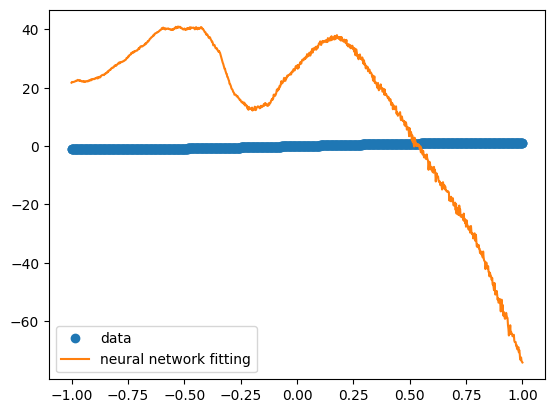

In [18]:
fcn = FNN(input_size=1, output_size=1, num_layers=100, hidden_size=32, activiation='relu')

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(fcn.parameters(), lr=0.001)

total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    optimizer.zero_grad()

    loss = criterion(fcn(x_data), y_data)

    loss.backward()
    
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))

# plot
plt.figure()
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, fcn(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.show()    